Iris Datasets

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [117]:
df.describe() # getting the statistical information on the numerical data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [118]:
df.isnull().sum() # getting the count of null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Data Visualisation

In [119]:
column_1 = df.columns
column_1

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [120]:
def plots(x): # defining a function for getting scatter plots
    plt.scatter(df[x],df['Species'])
    plt.title(str(x) + ' vs Speices')
    plt.xlabel(x)
    plt.ylabel('Speices')
    plt.show()

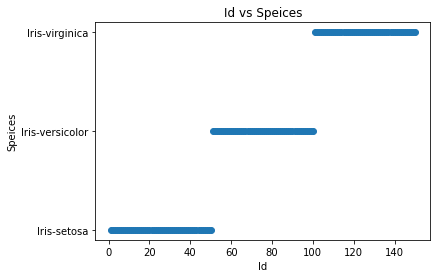

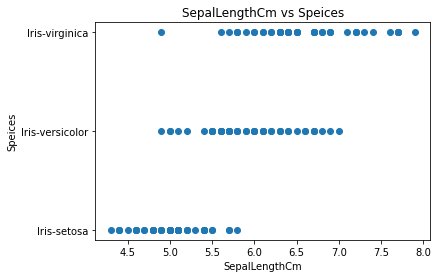

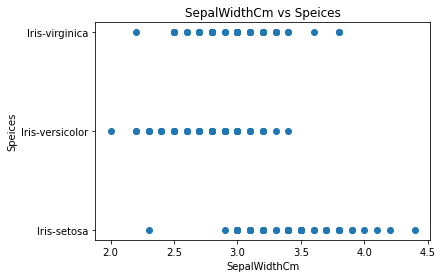

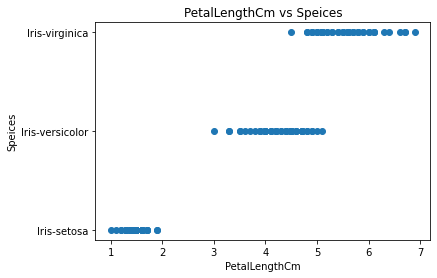

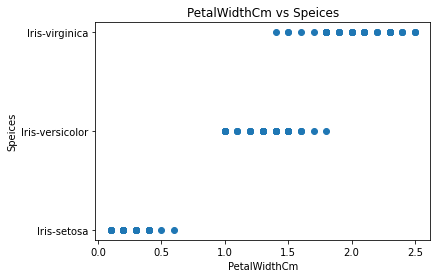

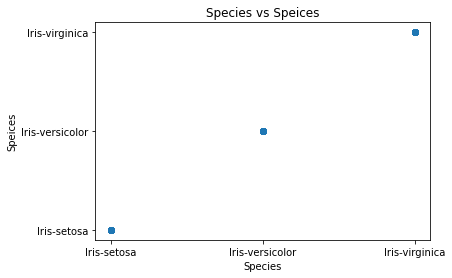

In [121]:
for i in column:
    plots(i)

C:\Users\megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

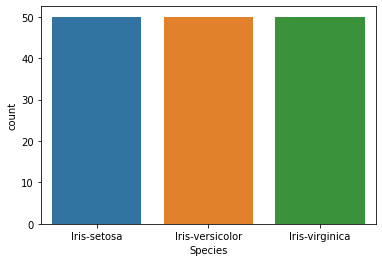

In [122]:
sns.countplot(df['Species'])

In [123]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [124]:
df.Species= df.Species.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [125]:
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

Splitting the data

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
x = df.iloc[:,1:4]
y = df.Species

In [128]:
print(x.shape,y.shape)

(150, 3) (150,)


In [129]:
x_train , x_test ,y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state = 3)

In [130]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(120, 3) (120,) (30, 3) (30,)


Importing Machine Learning models

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [133]:
print("The accuracy of testing data is :" , model.score(x_test,y_test)*100)

The accuracy of testing data is : 93.33333333333333


In [134]:
print("The accuracy of training data is ",model.score(x_train,y_train)*100)

The accuracy of training data is  96.66666666666667


Printing ROC Curve

In [135]:
from sklearn.metrics import roc_curve , roc_auc_score , confusion_matrix

In [136]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 2,
       2, 1, 0, 2, 2, 1, 1, 1], dtype=int64)

In [140]:
table = pd.get_dummies(y_pred)
table1 = pd.get_dummies(y_test)

In [141]:
x1 = table.iloc[:,0]
x2 = table.iloc[:,1]
x3 = table.iloc[:,2]
y1 = table1.iloc[:,0]
y2 = table1.iloc[:,1]
y3 = table1.iloc[:,2]

In [143]:
fpr , tpr , thres = roc_curve(x1,y1)
fpr1 , tpr1 , thres1 = roc_curve(x2,y2)
fpr2 , tpr2 , thres2 = roc_curve(x3,y3)

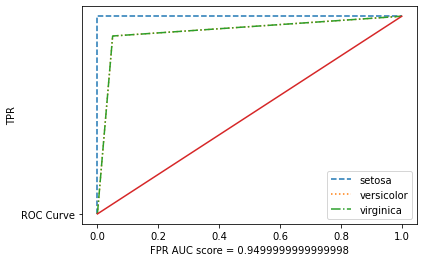

In [168]:
plt.plot(fpr,tpr, linestyle = '--')
plt.plot(fpr1,tpr1, linestyle = 'dotted')
plt.plot(fpr2,tpr2, linestyle = 'dashdot')
plt.plot([0,1],[0,1])
plt.plot("ROC Curve")
plt.xlabel("FPR " +"AUC score = " +str((roc_auc_score(x1,y1)+roc_auc_score(x2,y2)+roc_auc_score(x3,y3))/3))
plt.ylabel("TPR")
plt.legend(['setosa','versicolor','virginica'])